In [298]:
import numpy as np
import pandas as pd

In [299]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [300]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1415,ham,Jay is snickering and tells me that x is total...,NaN,NaN,NaN
4849,ham,Maybe you should find something else to do ins...,NaN,NaN,NaN
2706,ham,S now only i took tablets . Reaction morning o...,NaN,NaN,NaN
3409,ham,Joy's father is John. Then John is the ____ of...,NaN,NaN,NaN
4862,spam,Bored housewives! Chat n date now! 0871750.77....,NaN,NaN,NaN


In [301]:
df.shape

(5572, 5)

In [302]:
# data cleaning 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [303]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [304]:
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [305]:
# renaming columns
df.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)
df.head(5)


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [306]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [307]:
df['label'] = encoder.fit_transform(df['label'])
# 0 is ham, 1 is spam

In [308]:
df.head(5)

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [309]:
# checking missing values
df.isnull().sum()

label      0
message    0
dtype: int64

In [310]:
# checking for duplicates
df.duplicated().sum()

np.int64(403)

In [311]:
# removing duplicates 
df = df.drop_duplicates(keep='first')

In [312]:
df.duplicated().sum()

np.int64(0)

In [313]:
df.shape

(5169, 2)

In [314]:
# Exploratory Data Analysis : it is the process of analyzing data sets to summarize their main characteristics, often with visual methods.
df.head(5)

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [315]:
df['label'].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1dca4a325c0>,
 [Text(-1.014499732282844, 0.4251944181172162, 'ham'),
  Text(1.0144998708287172, -0.42519408755122207, 'spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37'),
  Text(0.553363565906573, -0.231924047755212, '12.63')])

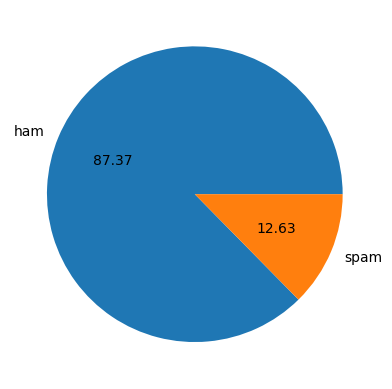

In [316]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")

In [317]:
# Data is imbalaced 

In [318]:
import nltk

In [319]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dpsvn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [320]:
df['num_characters'] = df['message'].apply(len)

In [321]:
df.head()

,label,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [322]:
df['num_words'] = df['message'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,label,message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [323]:
df['num_sentences'] = df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,label,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [324]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [325]:
df[df['label'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [326]:
df[df['label'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [327]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

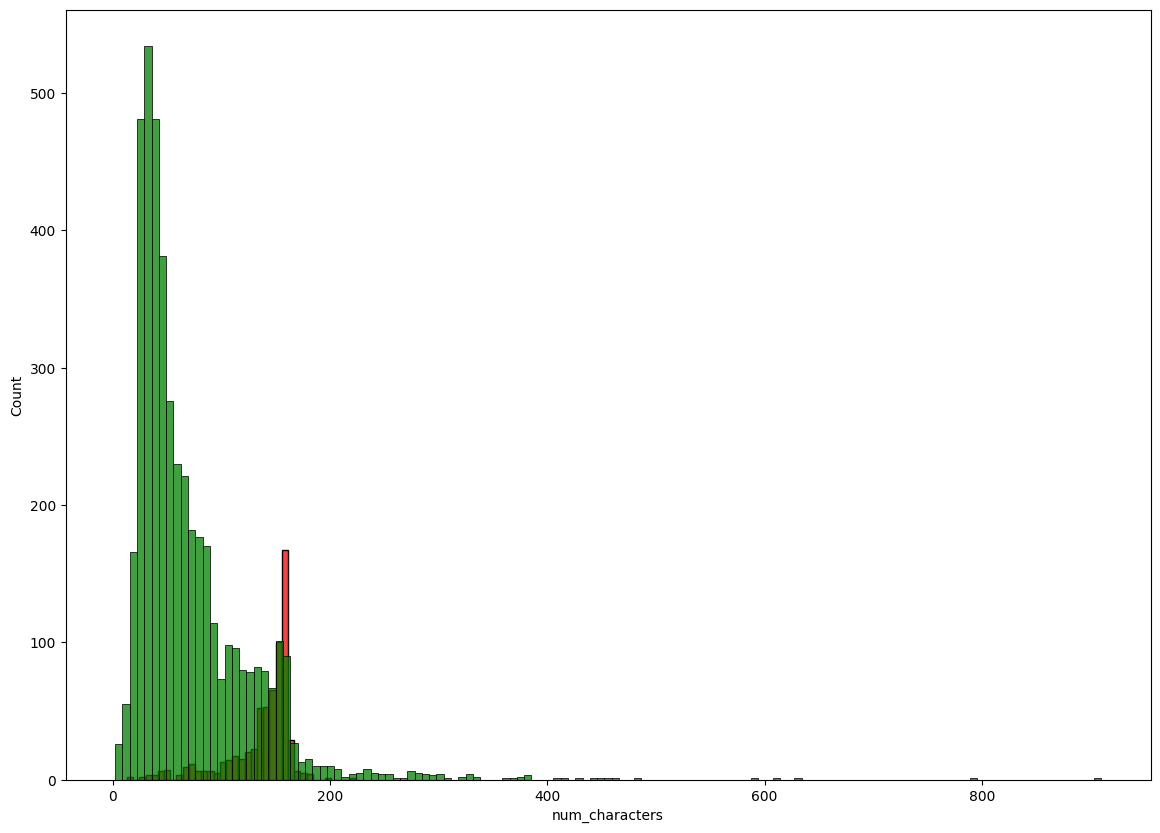

In [328]:
# Visualizing the distribution of number of characters in messages in both classes 
plt.figure(figsize=(14, 10))
sns.histplot(df[df['label'] == 1]['num_characters'], color ='red', label='spam')
sns.histplot(df[df['label'] == 0]['num_characters'], color ='green')

<Axes: xlabel='num_words', ylabel='Count'>

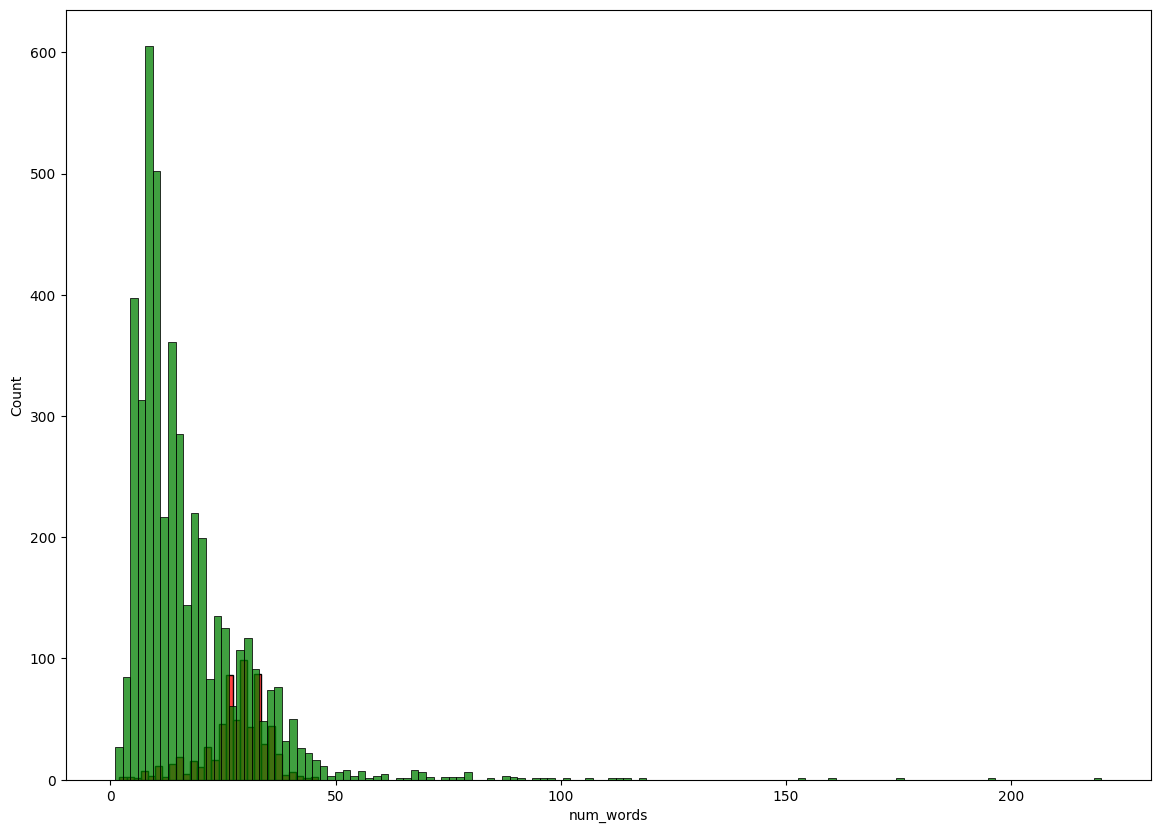

In [329]:
# Visualizing the distribution of number of words in messages in both classes 
plt.figure(figsize=(14, 10))
sns.histplot(df[df['label'] == 1]['num_words'], color ='red', label='spam')
sns.histplot(df[df['label'] == 0]['num_words'], color ='green')

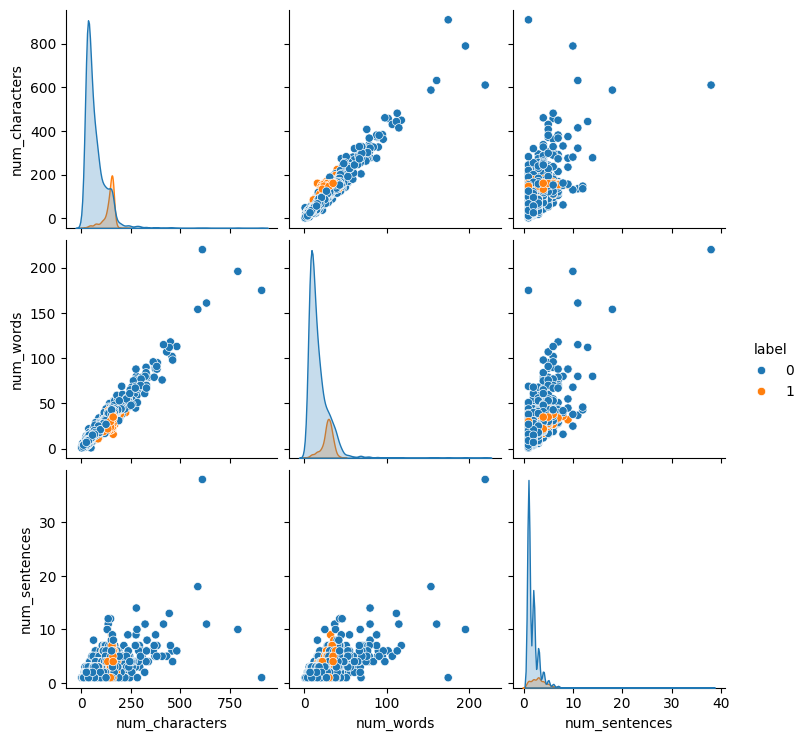

In [330]:
sns.pairplot(df, hue='label')

In [331]:
numeric_df = df.select_dtypes(include='number')
numeric_df.corr()

,label,num_characters,num_words,num_sentences
label,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

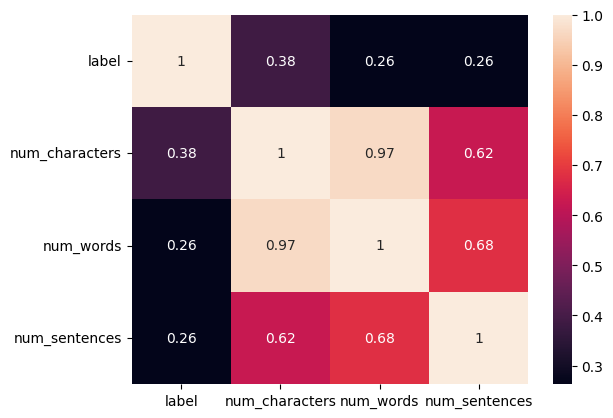

In [332]:
sns.heatmap(numeric_df.corr(), annot=True)

In [333]:
# Data Preprocessing
# -> lowercase conversion
# -> tokenization
# -> removing special characters
# -> removing stopwords and punctuation
# -> stemming 

In [334]:
def transform_text(message):
    message = message.lower()  # Lowercase conversion
    message = nltk.word_tokenize(message)  # Tokenization
    y = []
    for i in message:
        if i.isalnum():
            y.append(i)
    message = y[:]
    y.clear() # Clear the list for stopwords and punctuation removal
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    message = y[:]
    y.clear()  # Clear the list for stemming
    for i in message:
        y.append(ps.stem(i))
    return " ".join(y)

In [335]:
from nltk.corpus import stopwords
stopwords.words('english')
from nltk.stem import PorterStemmer
ps = PorterStemmer()
ps.stem('loving') # basically it will return the root word of the word passed


'love'

In [336]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [337]:
transform_text("Hello, I am going to market for buying some fruits and vegetables. Do you want anything?")

'hello go market buy fruit veget want anyth'

In [338]:
df['transformed_text'] = df['message'].apply(transform_text)

In [339]:
# wordcloud, is used to visualize the frequency of words in a text corpus.
# it displays words in different sizes, where the size of each word indicates its frequency or importance in the text.
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [340]:
spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].apply(lambda x: ' '.join(x)).str.cat(sep=' '))

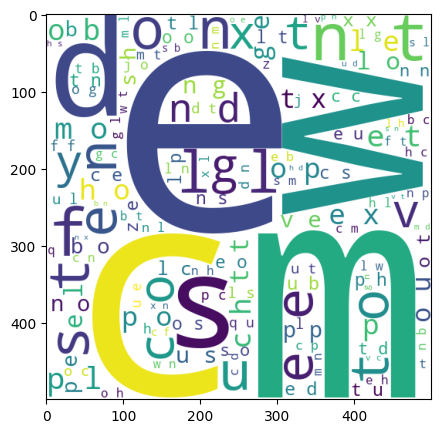

In [341]:
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc)

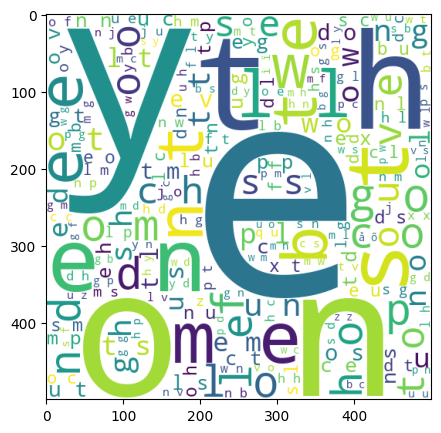

In [342]:
ham_wc = wc.generate(df[df['label'] == 0]['transformed_text'].apply(lambda x: ' '.join(x)).str.cat(sep=' '))
plt.figure(figsize=(10, 5))
plt.imshow(ham_wc)

In [343]:
df.head()

,label,message,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [344]:
spam_corpus = []
for msg in df[df['label'] == 1]['transformed_text'].tolist():
    for word in msg:
        spam_corpus.append(word)

In [345]:
len(spam_corpus)

56319

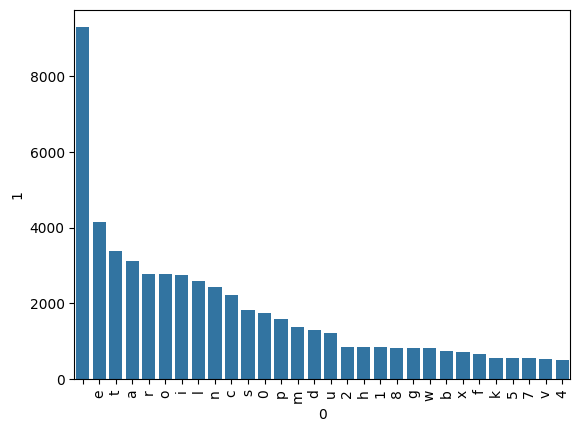

In [346]:
from collections import Counter
spam_freq = Counter(spam_corpus)
# Displaying the most common words in spam messages
# spam_freq.most_common(30)
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [347]:
ham_corpus = []
for msg in df[df['label'] == 0]['transformed_text'].tolist():
    for word in msg:
        ham_corpus.append(word)

In [348]:
len(ham_corpus)

177016

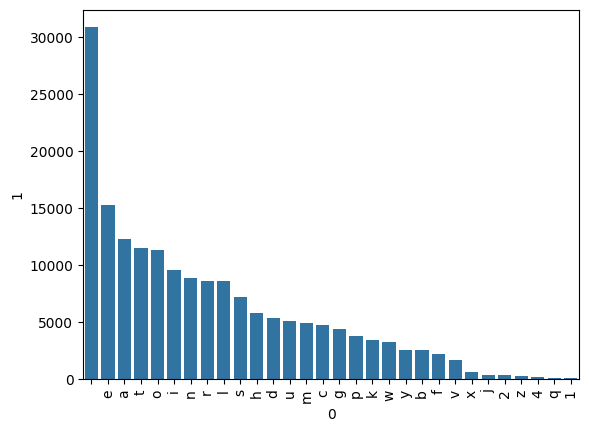

In [349]:
from collections import Counter
spam_freq = Counter(spam_corpus)
# Displaying the most common words in spam messages
# spam_freq.most_common(30)
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [350]:
# MODEL BUILDING

In [407]:
from sklearn.feature_extraction.text import CountVectorizer # it converts a collection of text documents to a matrix of token counts.
from sklearn.feature_extraction.text import TfidfVectorizer # it converts a collection of raw documents to a matrix of TF-IDF features.
cv = CountVectorizer() 
tfidf = TfidfVectorizer(max_features=3000)

In [408]:
x = cv.fit_transform(df['transformed_text']).toarray()
x2 = tfidf.fit_transform(df['transformed_text']).toarray()

In [409]:
print(x.shape)
print(x2.shape)

(5169, 6708)
(5169, 3000)


In [410]:
y = df['label'].values

In [411]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
x2_train, x2_test, y_train, y_test = train_test_split(x2, y, test_size=0.2, random_state=5)

In [412]:
# since for textual data naive bayes is the best model to use therefore tried  first this
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [413]:
print("Using CountVectorizer:")
# Gaussian Naive Bayes
gnb.fit(x_train, y_train)
y_pred_gnb = gnb.predict(x_test)
print("GaussianNB Accuracy:", accuracy_score(y_test, y_pred_gnb))
print("GaussianNB Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gnb))
print("GaussianNB Precision:", precision_score(y_test, y_pred_gnb)) 


Using CountVectorizer:
GaussianNB Accuracy: 0.8597678916827853
GaussianNB Confusion Matrix:
 [[776 129]
 [ 16 113]]
GaussianNB Precision: 0.4669421487603306


In [414]:
mnb.fit(x_train, y_train)
y_pred_mnb = mnb.predict(x_test)
print("MultinomialNB Accuracy:", accuracy_score(y_test, y_pred_mnb))
print("MultinomialNB Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mnb))
print("MultinomialNB Precision:", precision_score(y_test, y_pred_mnb))

MultinomialNB Accuracy: 0.9690522243713733
MultinomialNB Confusion Matrix:
 [[884  21]
 [ 11 118]]
MultinomialNB Precision: 0.8489208633093526


In [415]:
bnb.fit(x_train, y_train)
y_pred_bnb = bnb.predict(x_test)
print("BernoulliNB Accuracy:", accuracy_score(y_test, y_pred_bnb))
print("BernoulliNB Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bnb))
print("BernoulliNB Precision:", precision_score(y_test, y_pred_bnb))

BernoulliNB Accuracy: 0.9690522243713733
BernoulliNB Confusion Matrix:
 [[900   5]
 [ 27 102]]
BernoulliNB Precision: 0.9532710280373832


In [416]:
print("\nUsing TfidfVectorizer:")
# Gaussian Naive Bayes
gnb.fit(x2_train, y_train)
y_pred_gnb = gnb.predict(x2_test)
print("GaussianNB Accuracy:", accuracy_score(y_test, y_pred_gnb))
print("GaussianNB Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gnb))
print("GaussianNB Precision:", precision_score(y_test, y_pred_gnb))


Using TfidfVectorizer:
GaussianNB Accuracy: 0.8558994197292069
GaussianNB Confusion Matrix:
 [[777 128]
 [ 21 108]]
GaussianNB Precision: 0.4576271186440678


In [417]:
# Multinomial Naive Bayes
mnb.fit(x2_train, y_train)
y_pred_mnb = mnb.predict(x2_test)
print("MultinomialNB Accuracy:", accuracy_score(y_test, y_pred_mnb))
print("MultinomialNB Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mnb))
print("MultinomialNB Precision:", precision_score(y_test, y_pred_mnb))

MultinomialNB Accuracy: 0.9700193423597679
MultinomialNB Confusion Matrix:
 [[904   1]
 [ 30  99]]
MultinomialNB Precision: 0.99


In [418]:
# bernoulli Naive Bayes
bnb.fit(x2_train, y_train)
y_pred_bnb = bnb.predict(x2_test)
print("BernoulliNB Accuracy:", accuracy_score(y_test, y_pred_bnb))
print("BernoulliNB Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bnb))
print("BernoulliNB Precision:", precision_score(y_test, y_pred_bnb))

BernoulliNB Accuracy: 0.9816247582205029
BernoulliNB Confusion Matrix:
 [[905   0]
 [ 19 110]]
BernoulliNB Precision: 1.0


In [419]:
## TFID Vectorizer gives better results than Count Vectorizer 
# best model is Multinomial Naive Bayes with TfidfVectorizer

In [420]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier

In [422]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [423]:
# creating a list of models
models = {
    'SVC': svc,
    'KNeighborsClassifier': knc,
    'MultinomialNB': mnb,
    'DecisionTreeClassifier': dtc,
    'LogisticRegression': lrc,
    'RandomForestClassifier': rfc,
    'AdaBoostClassifier': abc,
    'BaggingClassifier': bc,
    'ExtraTreesClassifier': etc,
    'GradientBoostingClassifier': gbdt,
    'XGBClassifier': xgb
}

In [424]:
def train_classifier(model, x2_train, y_train, x2_test, y_test):
    model.fit(x2_train, y_train)
    y_pred = model.predict(x2_test) 
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision


In [425]:
train_classifier(svc, x2_train, y_train, x2_test, y_test)

(0.9738878143133463, 0.9811320754716981)

In [426]:
# accuracy  list after changing the tfidvectorizer hyperparameter max_features=3000
accuracy_list_max_ft_3000 = []
precision_list_max_ft_3000 = []
for model_name, model in models.items():
    accuracy, precision = train_classifier(model, x2_train, y_train, x2_test, y_test)
    accuracy_list_max_ft_3000.append(accuracy)
    precision_list_max_ft_3000.append(precision)
    print(f"{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}")

SVC - Accuracy: 0.9739, Precision: 0.9811
KNeighborsClassifier - Accuracy: 0.9139, Precision: 1.0000
MultinomialNB - Accuracy: 0.9700, Precision: 0.9900
DecisionTreeClassifier - Accuracy: 0.9313, Precision: 0.8372
LogisticRegression - Accuracy: 0.9574, Precision: 0.9775
RandomForestClassifier - Accuracy: 0.9749, Precision: 0.9905
AdaBoostClassifier - Accuracy: 0.9217, Precision: 0.8077
BaggingClassifier - Accuracy: 0.9516, Precision: 0.8376
ExtraTreesClassifier - Accuracy: 0.9758, Precision: 0.9643
GradientBoostingClassifier - Accuracy: 0.9497, Precision: 0.9326
XGBClassifier - Accuracy: 0.9729, Precision: 0.9550


In [ ]:
accuracy_list = []
precision_list = []

for model_name, model in models.items():
    accuracy, precision = train_classifier(model, x2_train, y_train, x2_test, y_test)
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    print(f"{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}")

SVC - Accuracy: 0.9700, Precision: 0.9900
KNeighborsClassifier - Accuracy: 0.9043, Precision: 1.0000
MultinomialNB - Accuracy: 0.9545, Precision: 1.0000
DecisionTreeClassifier - Accuracy: 0.9294, Precision: 0.8182
LogisticRegression - Accuracy: 0.9497, Precision: 0.9753
RandomForestClassifier - Accuracy: 0.9700, Precision: 1.0000
AdaBoostClassifier - Accuracy: 0.9226, Precision: 0.8182
BaggingClassifier - Accuracy: 0.9555, Precision: 0.8547
ExtraTreesClassifier - Accuracy: 0.9700, Precision: 0.9712
GradientBoostingClassifier - Accuracy: 0.9429, Precision: 0.8889
XGBClassifier - Accuracy: 0.9720, Precision: 0.9630


In [432]:
performance_df = pd.DataFrame({'Model': models.keys(), 'Accuracy': accuracy_list, 'Precision': precision_list, 'Accuracy_max_ft_3000': accuracy_list_max_ft_3000, 'Precision_max_ft_3000': precision_list_max_ft_3000})
performance_df

,Model,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,SVC,0.970019,0.990000,0.973888,0.981132
1,KNeighborsClassifier,0.904255,1.000000,0.913926,1.000000
2,MultinomialNB,0.954545,1.000000,0.970019,0.990000
3,DecisionTreeClassifier,0.929400,0.818182,0.931335,0.837209
4,LogisticRegression,0.949710,0.975309,0.957447,0.977528
5,RandomForestClassifier,0.970019,1.000000,0.974855,0.990476
6,AdaBoostClassifier,0.922631,0.818182,0.921663,0.807692
7,BaggingClassifier,0.955513,0.854701,0.951644,0.837607
8,ExtraTreesClassifier,0.970019,0.971154,0.975822,0.964286
9,GradientBoostingClassifier,0.942940,0.888889,0.949710,0.932584


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars='Model')
performance_df1

,Model,variable,value
0,SVC,Accuracy,0.970019
1,KNeighborsClassifier,Accuracy,0.904255
2,MultinomialNB,Accuracy,0.954545
3,DecisionTreeClassifier,Accuracy,0.929400
4,LogisticRegression,Accuracy,0.949710
5,RandomForestClassifier,Accuracy,0.970019
6,AdaBoostClassifier,Accuracy,0.922631
7,BaggingClassifier,Accuracy,0.955513
8,ExtraTreesClassifier,Accuracy,0.970019
9,GradientBoostingClassifier,Accuracy,0.942940


C:\Users\dpsvn\AppData\Local\Temp\ipykernel_26696\390899577.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:green'` for the same effect.

  sns.catplot(x='Model', y='value', hue='variable', data=performance_df1, kind='bar', color='green')


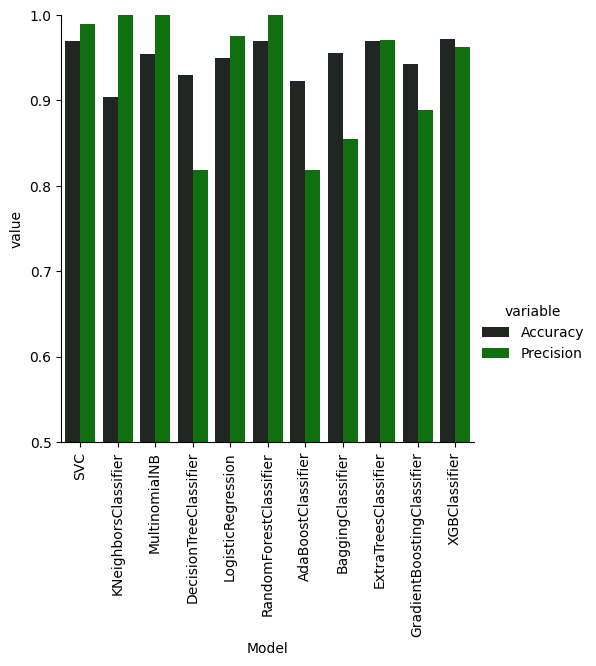

In [430]:
sns.catplot(x='Model', y='value', hue='variable', data=performance_df1, kind='bar', color='green')
plt.ylim(0.5, 1.0)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# will try to improve the model performance by using hyperparameter tuning
# 1. in tfidvectorizer will change hyperparameter max_features = 3000 which will take only 3000 most frequent words
# 2. after vectorising done scling but results were not improved theeofore not using it

# the best model Multinomial Naive Bayes with TfidfVectorizer after changing the hyperparameter max_features=3000

In [433]:
import pickle
# saving the model
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))